ThemeRegistry.enable('opaque')

In [140]:
df = pd.read_csv('data/taxes-by-city.csv')
# Add in lat/long data
cities = pd.read_csv('raw/mt-incorporated-cities.csv')
df = df.merge(cities[['city','class','longitude','latitude']], left_on='City', right_on='city').drop('city', axis=1)
df.head()

,County #,County,City Code,City,year,total_taxes,residential_taxes,total_taxes_per_capita,residential_taxes_per_capita,res_percent,non_res_taxes,non_res_taxes_per_capita,class_x,longitude_x,latitude_x,class_y,longitude_y,latitude_y
0,54.0,Mineral,ALB-54,Alberton,2002,169691.80788,102830.42980,457.390318,277.170970,0.605983,66861.37808,180.219348,TN,-114.481673,47.00394,TN,-114.481673,47.00394
1,54.0,Mineral,ALB-54,Alberton,2003,189834.11928,113499.47769,496.947956,297.119052,0.597888,76334.64159,199.828905,TN,-114.481673,47.00394,TN,-114.481673,47.00394
2,54.0,Mineral,ALB-54,Alberton,2004,232099.20300,133029.63240,596.656049,341.978489,0.573159,99069.57060,254.677559,TN,-114.481673,47.00394,TN,-114.481673,47.00394
3,54.0,Mineral,ALB-54,Alberton,2005,260922.12510,151541.15249,644.252161,374.175685,0.580791,109380.97261,270.076476,TN,-114.481673,47.00394,TN,-114.481673,47.00394
4,54.0,Mineral,ALB-54,Alberton,2006,278240.98669,164174.46569,672.079678,396.556680,0.590044,114066.52100,275.522998,TN,-114.481673,47.00394,TN,-114.481673,47.00394


In [134]:
# df['non_res_taxes'] = df['total_taxes'] - df['residential_taxes']
# df['non_res_taxes_per_capita'] = df['total_taxes_per_capita'] - df['residential_taxes_per_capita']

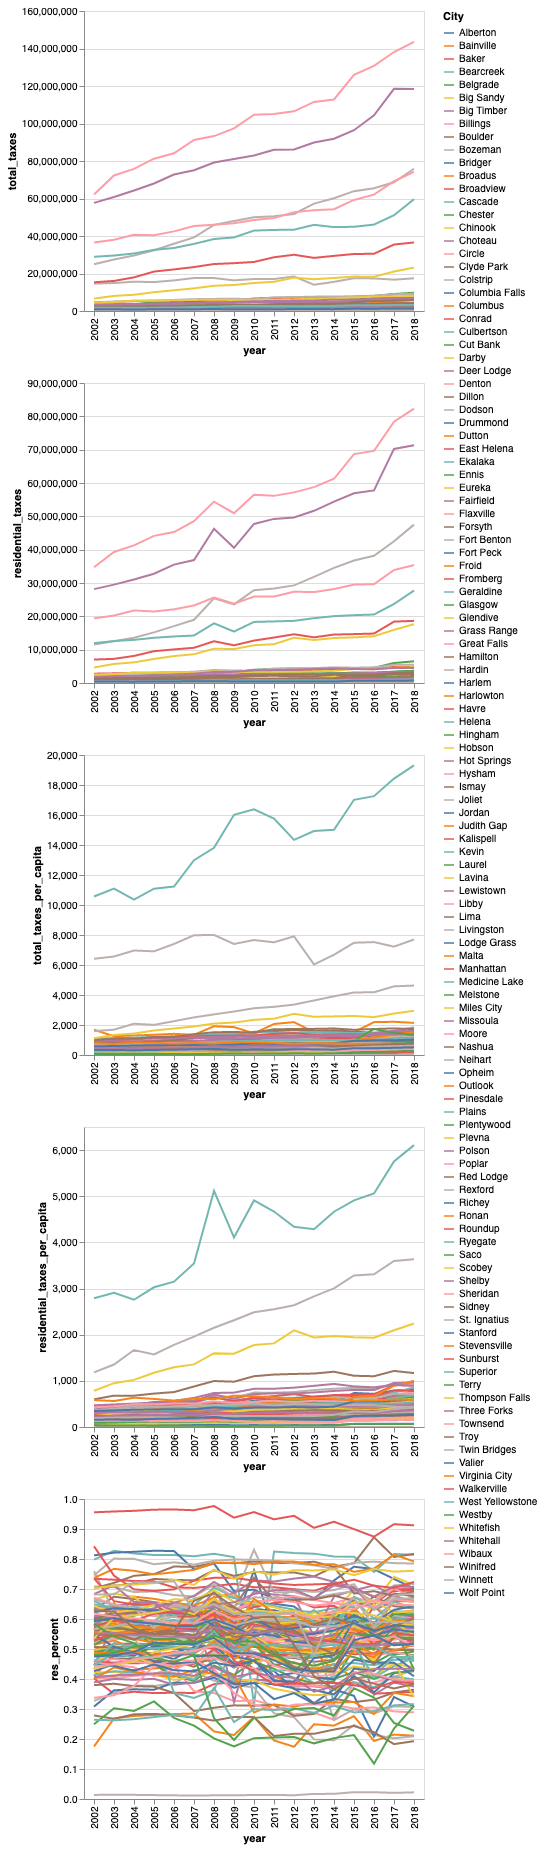

In [79]:
plot_vars = [
    'total_taxes','residential_taxes','total_taxes_per_capita',
    'residential_taxes_per_capita','res_percent',
]

alt.Chart(df).mark_line().encode(
    x='year:O',
    y=alt.Y(alt.repeat('row'), type='quantitative'),
    color='City',
    tooltip=['City'],
).repeat(
    row=plot_vars
)

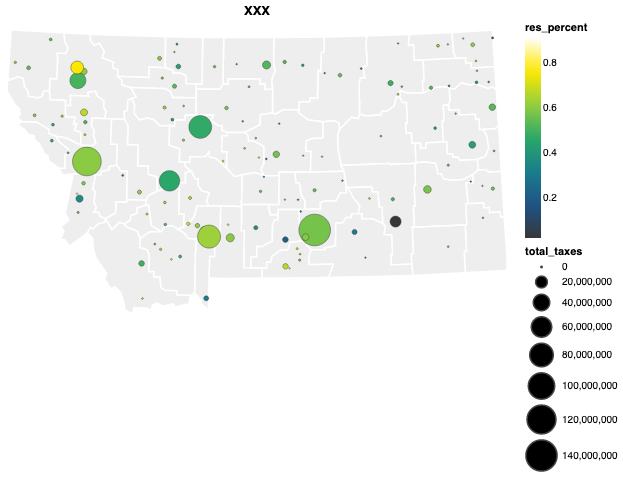

In [131]:
mt_counties_topojson_url = 'https://gist.githubusercontent.com/eidietrich/30118ba41ea41681948b06b0cf75864f/raw/9f8a2ed6d61d8ad7c42207ab4ef55a1e6548a909/mt-10m-counties.json'
county_lines = alt.topo_feature(mt_counties_topojson_url, 'counties')
mt_highways_topojson_url = 'https://gist.githubusercontent.com/eidietrich/67cbe6196b6b87698fc42f50e96076ab/raw/4d51ceb627c76360497837e1ac5338698f7df752/ne_mt_highways_state_resolution.topojson.json'
highways = alt.topo_feature(mt_highways_topojson_url, 'highways')

background = alt.Chart(county_lines).mark_geoshape(
    fill='#eee',
    stroke='white',
    strokeWidth=1.5,
)

roads = alt.Chart(highways).mark_geoshape(
    stroke='#666',
    strokeWidth=1,
    opacity=0.1
)

# cities = alt.Chart(cities).mark_square(size=20, fill='none', stroke='#444', strokeWidth=1).encode(
#     longitude='longitude:Q',
#     latitude='latitude:Q'
# )

points = alt.Chart(df[df['year'] == 2018]).mark_circle(
    opacity=1,
    stroke='#444',
    strokeWidth=0.5,
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.Size('total_taxes:Q', scale=alt.Scale(range=[2,1000])),
    color=alt.Color('res_percent:Q', 
                    scale=alt.Scale(
                        scheme='darkmulti',
#                         domain=[0,2000]
                    )),
#     color=alt.value('brown'),
    tooltip=['City', 'residential_taxes_per_capita','res_percent','total_taxes'],
)

# .configure(numberFormat='$,.0f')
(background + points).configure_view(strokeOpacity=0).project(
    type='albers',
    rotate=[110,0]
).properties(
    width=500,
    height=300,
    title='XXX',  
)

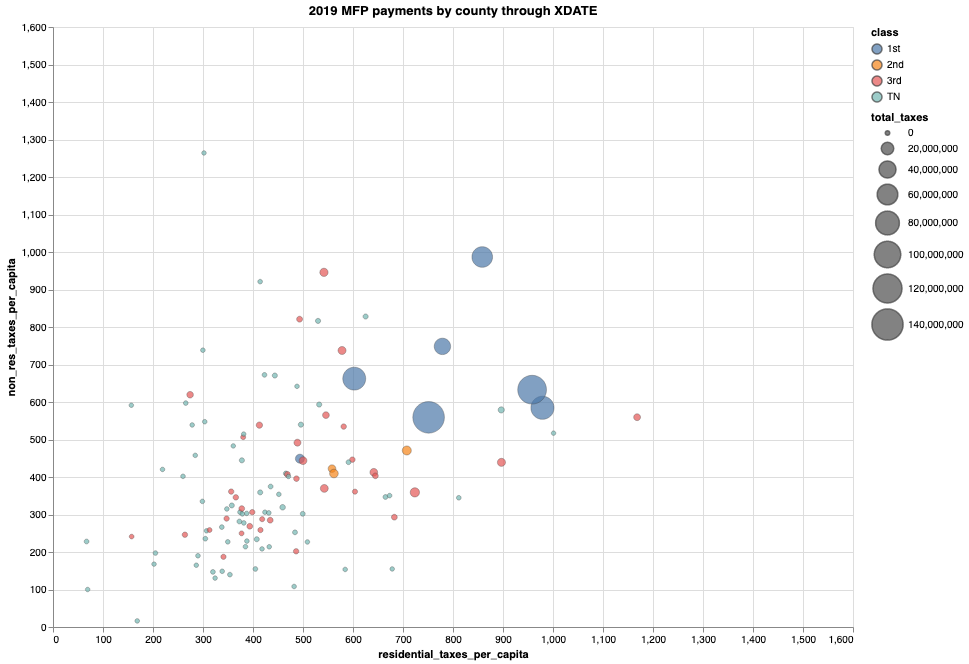

In [136]:
s = alt.Scale(domain=[0,1500])

alt.Chart(df[df['year'] == 2018]).mark_circle(
    opacity=0.7,
#     fill='blue',
    stroke='#444',
    strokeWidth=0.5,
    clip=True,
).encode(
    x=alt.X('residential_taxes_per_capita', scale=s),
    y=alt.Y('non_res_taxes_per_capita', scale=s),
    size=alt.Size('total_taxes', scale=alt.Scale(range=[20,1000])),
    color='class',
    detail='City',
    tooltip=['City','total_taxes'],
).properties(
    width=800,
    height=600,
    title='2019 MFP payments by county through XDATE',  
)

# 'total_taxes','residential_taxes','total_taxes_per_capita', 'residential_taxes_per_capita','res_percent',

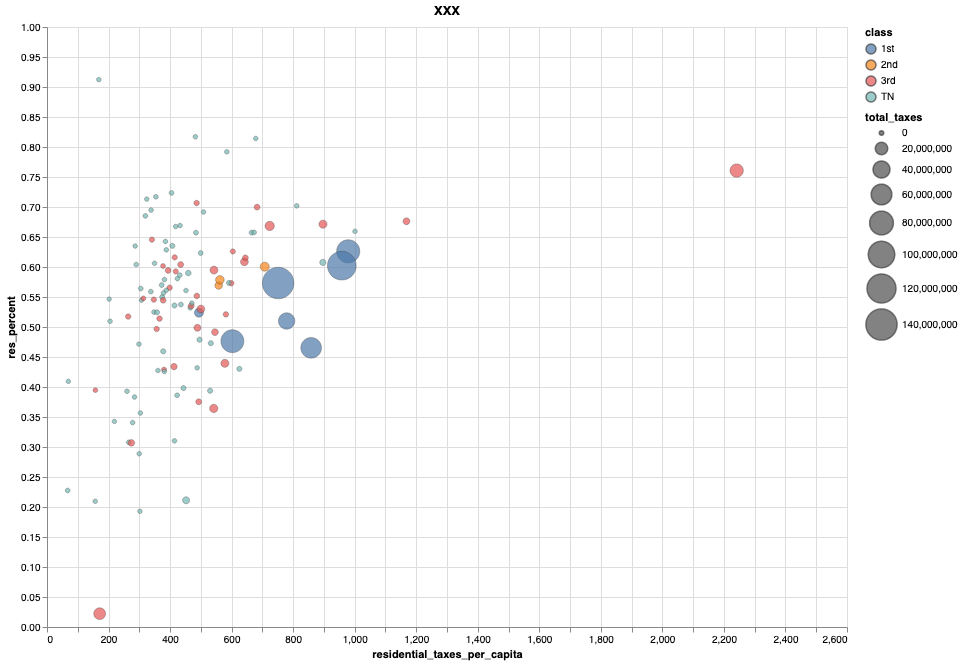

In [138]:
s = alt.Scale(domain=[0,2500])

alt.Chart(df[df['year'] == 2018]).mark_circle(
    opacity=0.7,
#     fill='blue',
    stroke='#444',
    strokeWidth=0.5,
    clip=True,
).encode(
    x=alt.X('residential_taxes_per_capita', scale=s),
    y=alt.Y('res_percent'),
    size=alt.Size('total_taxes', scale=alt.Scale(range=[20,1000])),
    color='class',
    detail='City',
    tooltip=['City','total_taxes'],
).properties(
    width=800,
    height=600,
    title='XXX',  
)

NameError: name 'counties' is not defined